# Other photo manipulations (working)

## Import class definitions

In [243]:
from matplotlib import pyplot as plt

from pointillism import pointillize, pointillizeStack, pointillizePile
%run pointillism.py

## Abstract dots

In [348]:
%run pointillism.py

In [349]:
point = pointillize(location='images/IMG_0060.jpg', debug=True, plot_coverage=True, use_coverage=True, use_complexity=False)
point.crop_Y([4000,2000], True)
point.plotRandomPointsComplexity(n=7.5e2, constant=0.03, power=1.5, min_size=0.003, alpha='currently_hardcoded')  

plotRandomPointsComplexity: done...took 0.93 sec


In [350]:
point.save_out(location='composite/', suffix='composite')

images/IMG_0060.jpg


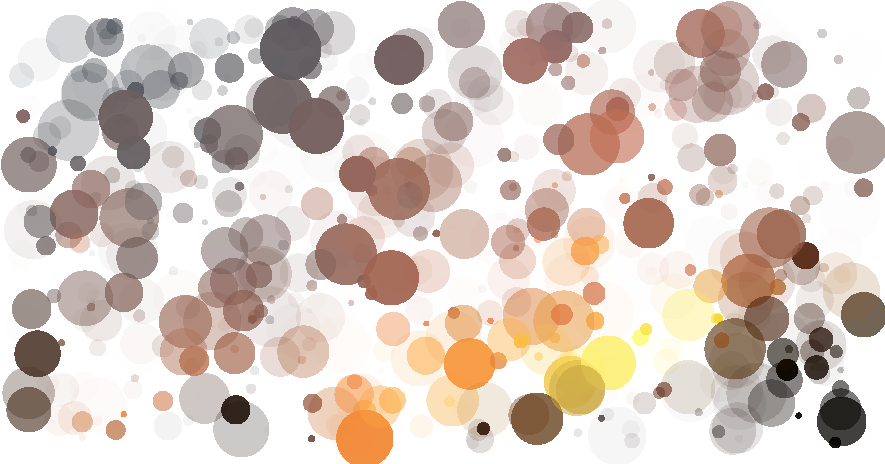

In [351]:
point.display()

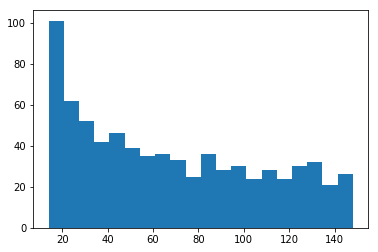

In [352]:
plt.hist(point.radius_list, bins=20)
plt.show()

In [353]:
point = pointillize(location='images/IMG_0093.jpg', debug=True, plot_coverage=True, use_coverage=True, use_complexity=False)
point.crop_Y([4000,2000], True)
point.plotRandomPointsComplexity(n=7.5e2, constant=0.03, power=1.5, min_size=0.003, alpha='currently_hardcoded')   

plotRandomPointsComplexity: done...took 0.93 sec


In [354]:
point.save_out(location='composite/', suffix='composite')

images/IMG_0093.jpg


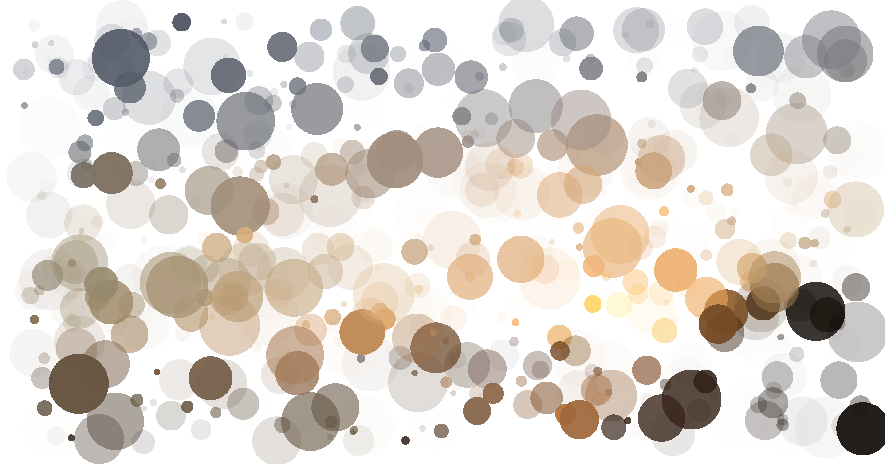

In [355]:
point.display()

In [356]:
point = pointillize(location='images/IMG_0290.jpg', debug=True, plot_coverage=True, use_coverage=True, use_complexity=False)
point.crop_Y([4000,2000], True)
point.plotRandomPointsComplexity(n=7.5e2, constant=0.03, power=1.5, min_size=0.003, alpha='currently_hardcoded') 

plotRandomPointsComplexity: done...took 0.84 sec


In [357]:
point.save_out(location='composite/', suffix='composite')

images/IMG_0290.jpg


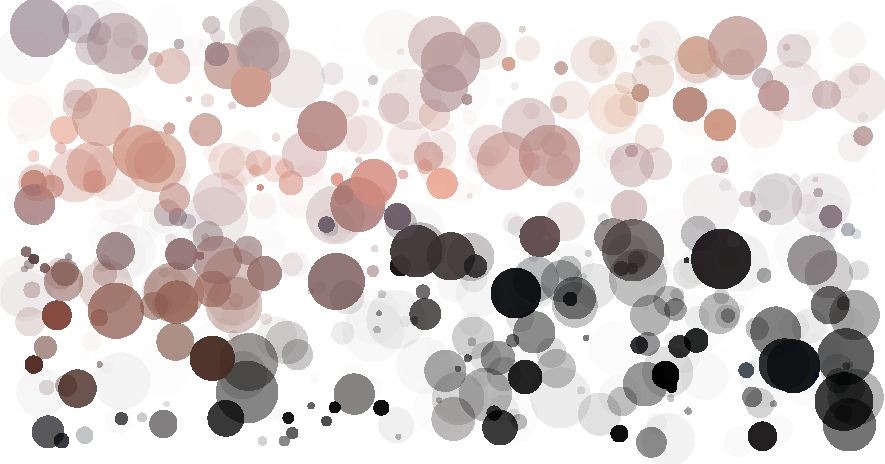

In [358]:
point.display()

In [359]:
point = pointillize(location='images/IMG_0302.jpg', debug=True, plot_coverage=True, use_coverage=True, use_complexity=False)
point.crop_Y([4000,2000], True)
point.plotRandomPointsComplexity(n=7.5e2, constant=0.03, power=1.5, min_size=0.003, alpha='currently_hardcoded') 

plotRandomPointsComplexity: done...took 0.70 sec


In [360]:
point.save_out(location='composite/', suffix='composite')

images/IMG_0302.jpg


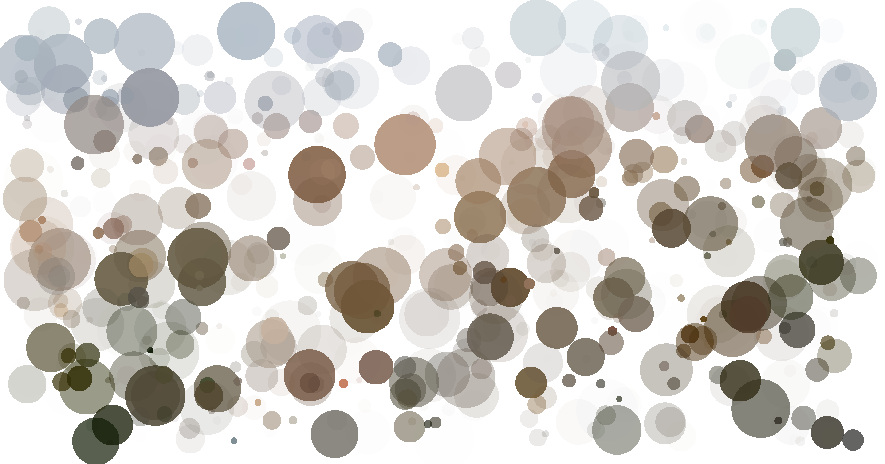

In [361]:
point.display()

In [362]:
size = (2200,4200)
n = 4
border = 50
canvas = Image.new('RGB', (size[0]*4 + border*(n+1),size[1] + border*2))
location = 'composite/'

for i,im in enumerate(os.listdir(location)):
    to_paste = Image.open(location + im)
    to_paste = to_paste.rotate(90, expand=True)
    canvas.paste(to_paste, (border+i*(size[0]+border),border))

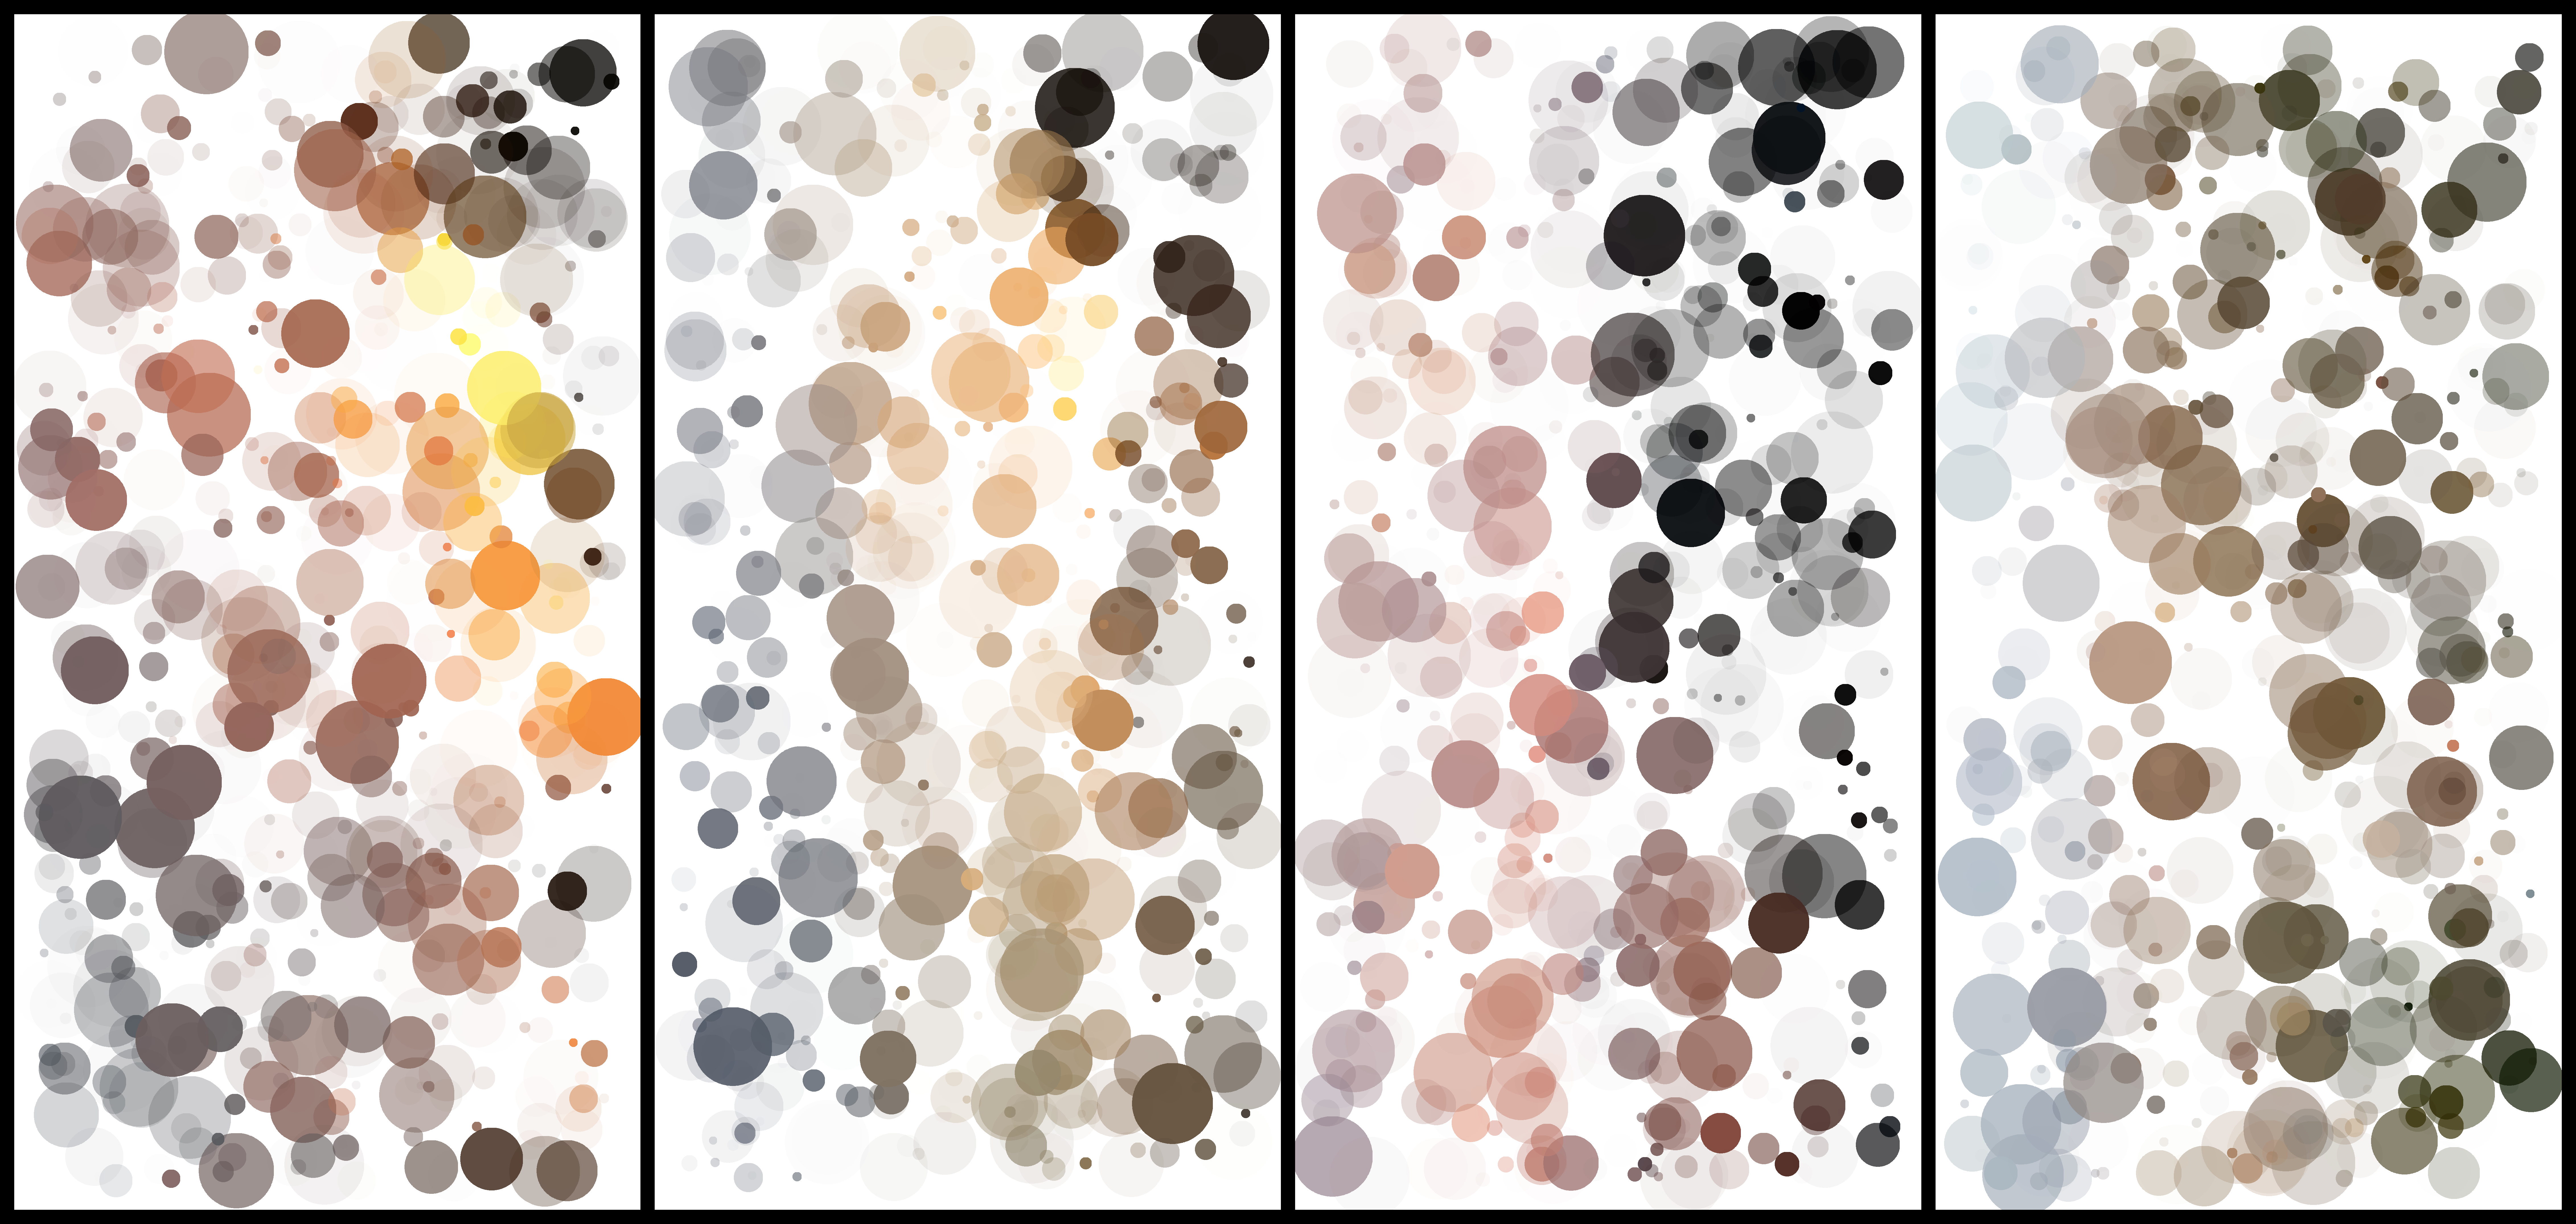

In [363]:
canvas

In [325]:
canvas.save('canvas.jpg')

## Sobel

In [3]:
# Create instance on directory or filename
point = pointillize(location='images/IMG_3197.jpg', debug = True, border = 0)

# Crop
point.crop_Y([1000,500], True)

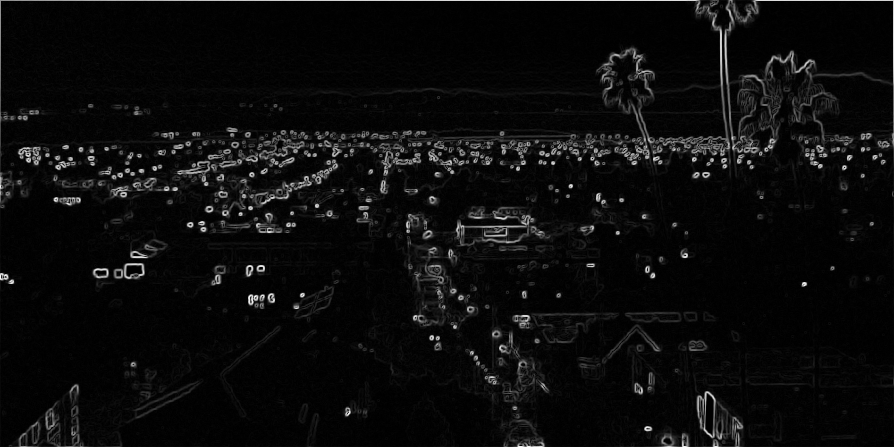

In [4]:
from scipy import ndimage
im = point.array[:,:,0].copy()
sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)
Image.fromarray((sob/sob.max()*255).astype('uint8'))

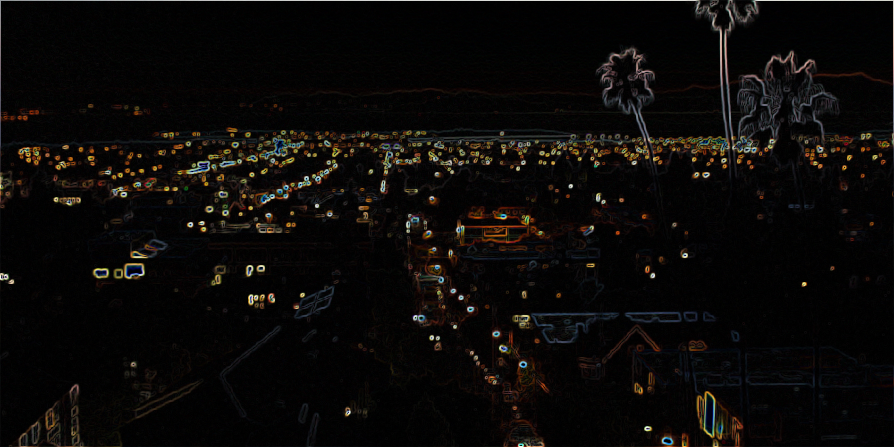

In [5]:
from scipy import ndimage
array_list = []
for color in range(0,3):
    im = point.array[:,:,color].copy()
    sx = ndimage.sobel(im, axis=0, mode='constant')
    sy = ndimage.sobel(im, axis=1, mode='constant')
    sob = np.hypot(sx, sy)
    array_list.append(sob)
stacked = np.dstack(array_list)
Image.fromarray((stacked/stacked.max()*255).astype('uint8'))

## Guassian

In [6]:
# Create instance on directory or filename
point = pointillize(location='images/IMG_0368.jpg', debug = True, border = 0)

# Crop
point.crop_Y([1000,500], False)

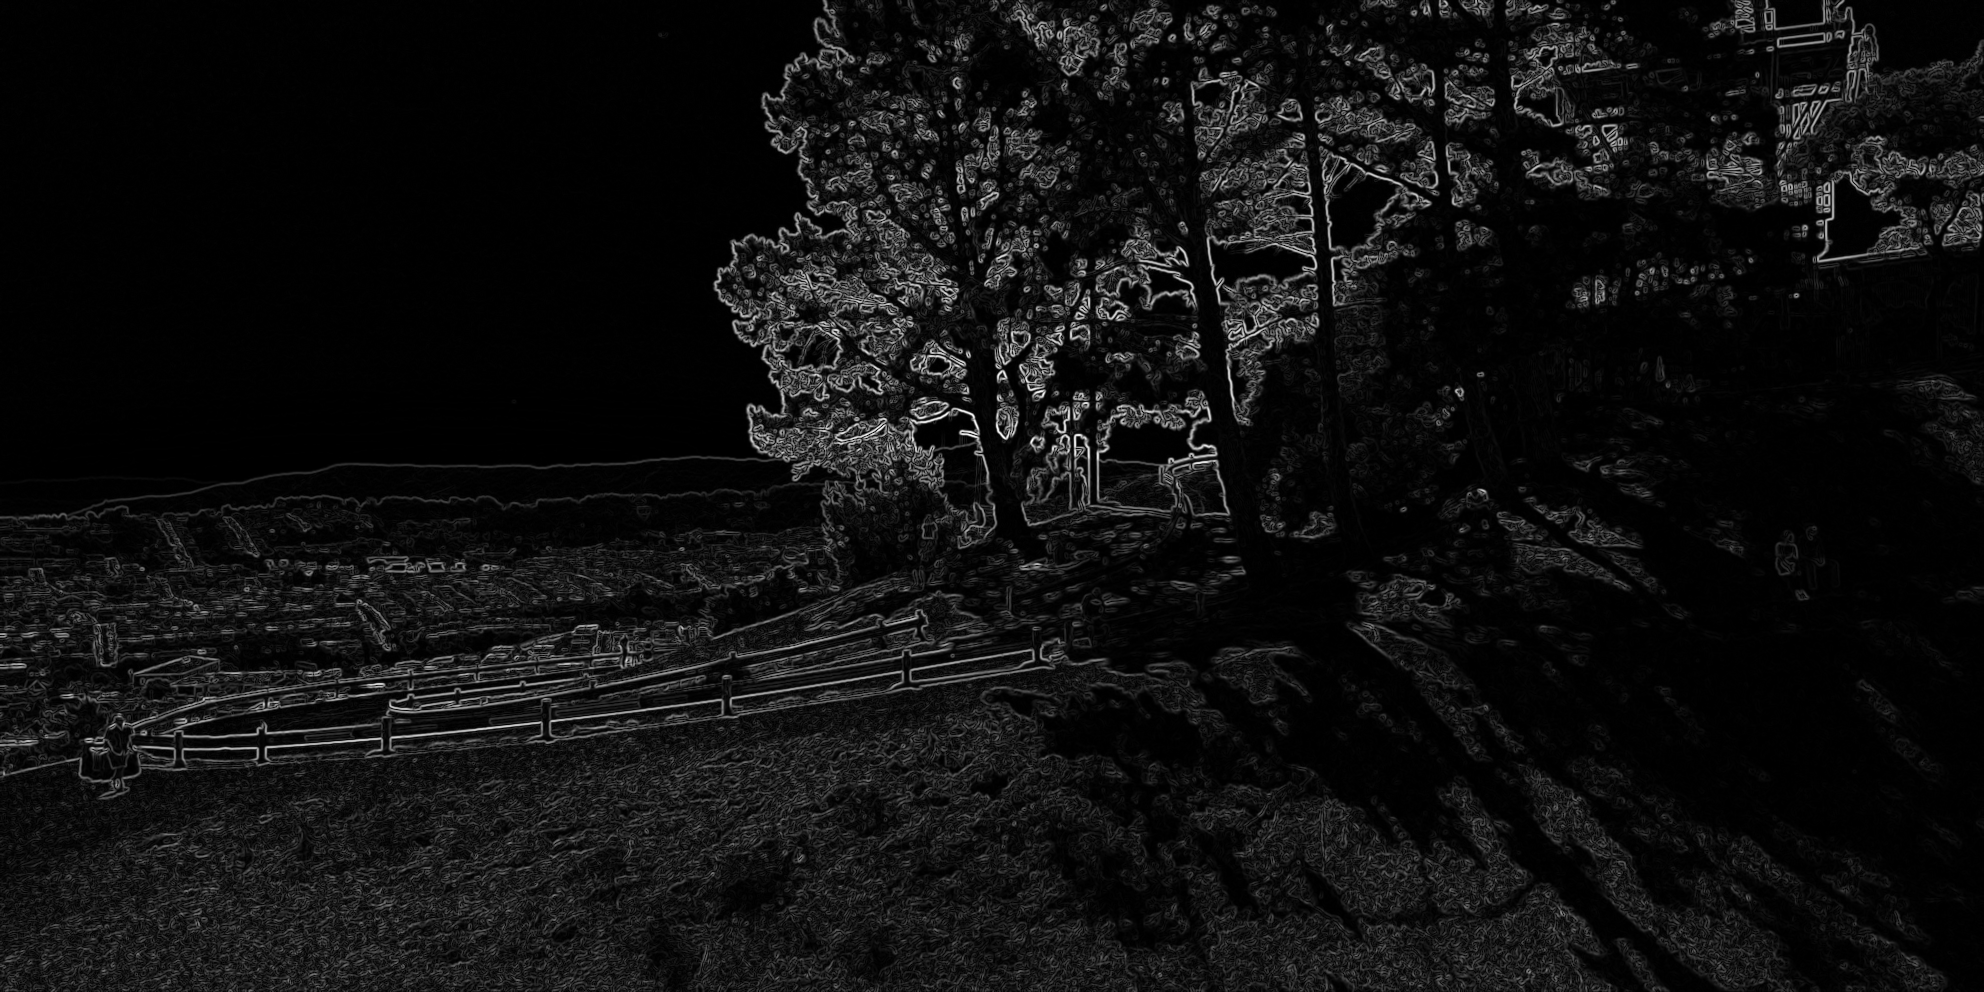

In [7]:
im = point.array.sum(axis=2).copy()
sob = ndimage.gaussian_gradient_magnitude(im, sigma=1)
Image.fromarray((sob/sob.max()*255).astype('uint8'))

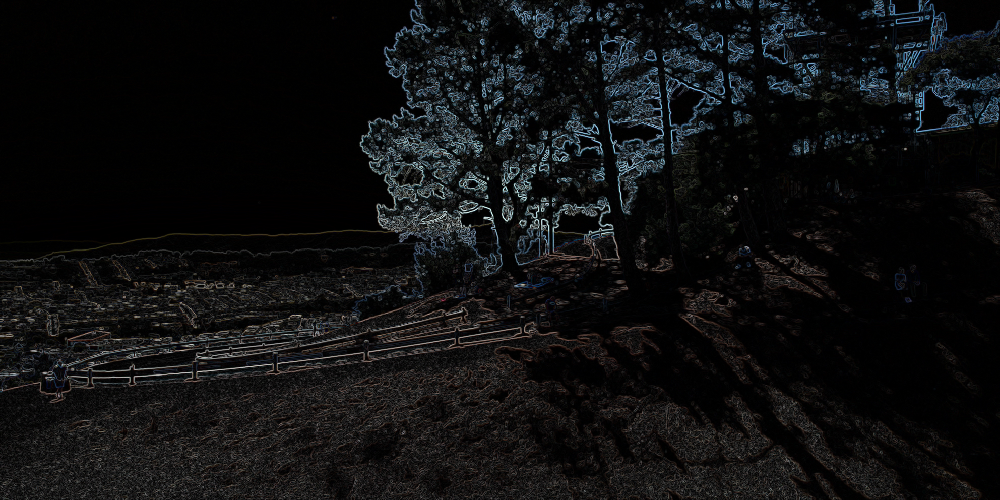

In [8]:
from scipy import ndimage
array_list = []
for color in range(0,3):
    im = point.array[:,:,color].copy()
    sob = ndimage.gaussian_gradient_magnitude(im, sigma=1)
    array_list.append(sob)
stacked = np.dstack(array_list)
Image.fromarray((stacked/stacked.max()*255).astype('uint8')).resize((1000,500))

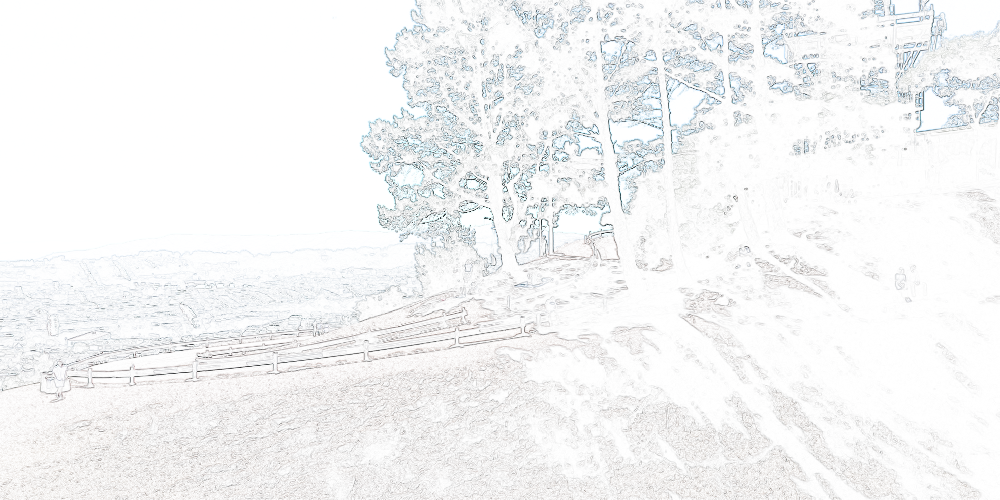

In [9]:
im = point.array.sum(axis=2).copy()
sob = ndimage.gaussian_gradient_magnitude(im, sigma=1)
image = point.image.copy()
out = Image.fromarray((sob/sob.max()*255).astype('uint8'))
out = out.resize(image.size)
image.putalpha(out)
white = Image.new(size=image.size, color=(255,255,255), mode='RGB')
white.paste(image, (0,0), image)
#white.save('etc/DJI_borders.jpg')
white.resize((1000,500))

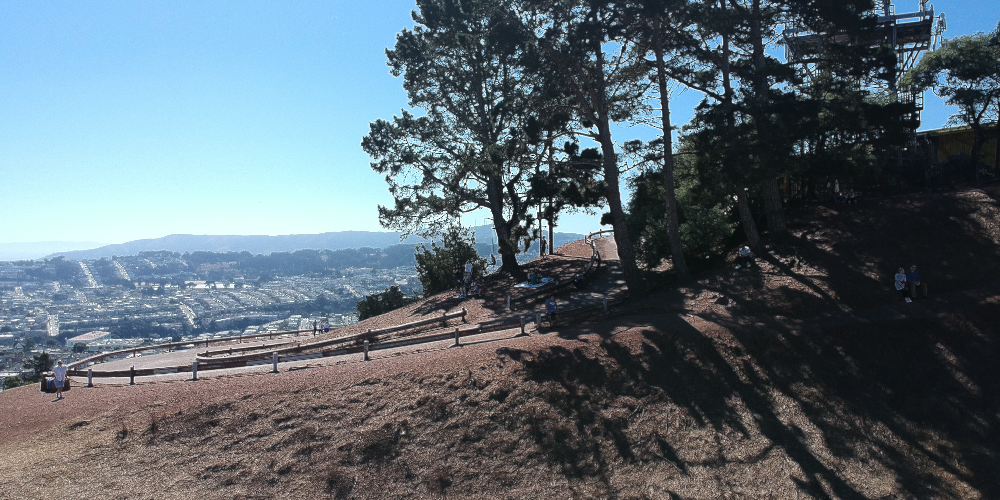

In [10]:
from PIL import ImageOps
im = point.array.sum(axis=2).copy()
sob = ndimage.gaussian_gradient_magnitude(im, sigma=1)
image = point.image.copy()
out = Image.fromarray((sob/sob.max()*255).astype('uint8'))
out = ImageOps.invert(out)
out = out.resize(image.size)
image.putalpha(out)
white = Image.new(size=image.size, color=(255,255,255), mode='RGB')
white.paste(image, (0,0), image)
#white.save('etc/DJI_noborders.jpg')
white.resize((1000,500))
